In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## age and bodymass

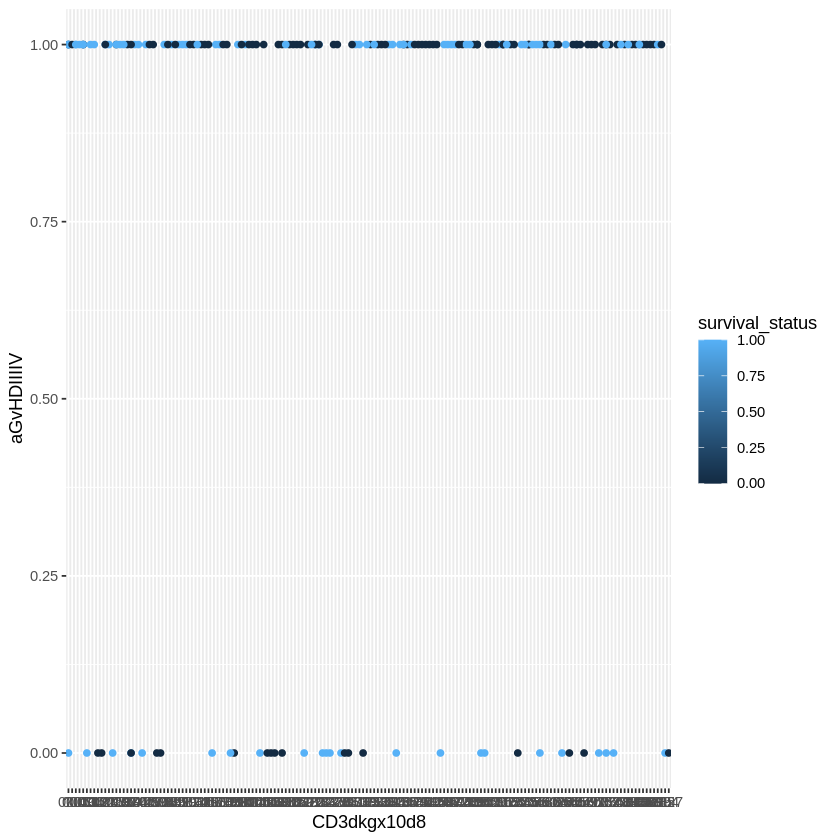

In [18]:
age_plot <- bone_data |>
ggplot(aes(x=CD3dkgx10d8, y = CD3dCD34, color = survival_status))+
geom_point()
age_plot

In [20]:
age_data <- bone_data |>
select(ANCrecovery, Rbodymass, survival_status)
head(age_data)/'

ERROR: Error in parse(text = x, srcfile = src): <text>:3:16: unexpected INCOMPLETE_STRING
2: select(ANCrecovery, Rbodymass, survival_status)
3: head(age_data)/'
                  ^


In [25]:
bone_data <- read_csv("data/boneMarrow.csv")
head(bone_data)
colnames(bone_data)
glimpse(bone_data)

Rows: 187 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): RecipientABO, RecipientRh, ABOmatch, CMVstatus, DonorCMV, Recipien...
dbl (25): id, Recipientgender, Stemcellsource, Donorage, Donorage35, IIIV, G...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,⋯,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,22.83014,0,1,0,1,1,1,⋯,1,7.20,1.33876,5.38,35,19,51,32,999,0
2,1,0,23.34247,0,1,0,-1,-1,1,⋯,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
3,1,0,26.39452,0,1,0,-1,-1,1,⋯,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
4,0,0,39.68493,1,1,0,1,2,1,⋯,?,4.25,29.481647,0.14,50,23,29,19,53,1
5,0,1,33.35890,0,0,0,1,2,0,⋯,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0
6,1,0,27.39178,0,0,0,2,0,1,⋯,1,3.27,8.412758,0.39,40,16,70,1000000,2800,0


[1] "id"                   "Recipientgender"      "Stemcellsource"      
 [4] "Donorage"             "Donorage35"           "IIIV"                
 [7] "Gendermatch"          "DonorABO"             "RecipientABO"        
[10] "RecipientRh"          "ABOmatch"             "CMVstatus"           
[13] "DonorCMV"             "RecipientCMV"         "Disease"             
[16] "Riskgroup"            "Txpostrelapse"        "Diseasegroup"        
[19] "HLAmatch"             "HLAmismatch"          "Antigen"             
[22] "Alel"                 "HLAgrI"               "Recipientage"        
[25] "Recipientage10"       "Recipientageint"      "Relapse"             
[28] "aGvHDIIIIV"           "extcGvHD"             "CD34kgx10d6"         
[31] "CD3dCD34"             "CD3dkgx10d8"          "Rbodymass"           
[34] "ANCrecovery"          "PLTrecovery"          "time_to_aGvHD_III_IV"
[37] "survival_time"        "survival_status"

Rows: 187
Columns: 38
$ id                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Recipientgender      <dbl> 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1…
$ Stemcellsource       <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1…
$ Donorage             <dbl> 22.83014, 23.34247, 26.39452, 39.68493, 33.35890,…
$ Donorage35           <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1…
$ IIIV                 <dbl> 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1…
$ Gendermatch          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ DonorABO             <dbl> 1, -1, -1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0,…
$ RecipientABO         <chr> "1", "-1", "-1", "2", "2", "0", "1", "1", "0", "0…
$ RecipientRh          <chr> "1", "1", "1", "1", "0", "1", "0", "1", "1", "1",…
$ ABOmatch             <chr> "0", "0", "0", "1", "1", "1", "1", "1", "1", "1",…
$ CMVstatus            <chr> "3", "0", "2", "1", "0", "?", "?", "1", "2", "2",…
$ DonorCMV        

In [41]:
filtered_bone <- bone_data|>
select(-survival_time, -RecipientABO, -RecipientRh, -ABOmatch, -CMVstatus,-DonorCMV, -RecipientCMV, -Disease, -Antigen,-Alel,-extcGvHD)|>
  mutate(survival_status = as_factor(survival_status),
        CD3dCD34 = as.numeric(CD3dCD34),
        CD3dkgx10d8 = as.numeric(CD3dkgx10d8),
        Rbodymass = as.numeric(Rbodymass))
glimpse(filtered_bone)
dim(filtered_bone)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Rows: 187
Columns: 27
$ id                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Recipientgender      <dbl> 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1…
$ Stemcellsource       <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1…
$ Donorage             <dbl> 22.83014, 23.34247, 26.39452, 39.68493, 33.35890,…
$ Donorage35           <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1…
$ IIIV                 <dbl> 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1…
$ Gendermatch          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ DonorABO             <dbl> 1, -1, -1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0,…
$ Riskgroup            <dbl> 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0…
$ Txpostrelapse        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Diseasegroup         <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1…
$ HLAmatch             <dbl> 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 0, 0, 0, 1, 1…
$ HLAmismatch     

[1] 187  27

In [47]:
set.seed(123)
iris_split <- initial_split(filtered_bone, prop = 0.75, strata = survival_status)
iris_training <- training(iris_split)
iris_testing <- testing(iris_split)
glimpse(iris_training)
dim(iris_training)

# standardize data
iris_recipe <- recipe(survival_status ~ Donorage, Recipientage, Rbodymass, CD34kgx10d6,CD3dCD34, data = iris_training) |>
  step_scale(all_predictors())|>
  step_center(all_predictors())

# build the model structure
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune())|> # in here it's tune
  set_engine("kknn")|>
  set_mode("classification")

# setting the folds and ks
set.seed(234)
iris_vfold <- vfold_cv(iris_training, v = 5, strata = survival_status)
k_val <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

# build the workflow for building model
knn_fit <- workflow()|>
  add_recipe(iris_recipe)|>
  add_model(knn_spec)|>
  tune_grid(resamples = iris_vfold, grid = k_val)

Rows: 139
Columns: 27
$ id                   <dbl> 9, 10, 11, 12, 13, 15, 19, 20, 23, 25, 26, 27, 29…
$ Recipientgender      <dbl> 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0…
$ Stemcellsource       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1…
$ Donorage             <dbl> 32.64110, 28.78356, 29.73151, 36.80000, 40.86301,…
$ Donorage35           <dbl> 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1…
$ IIIV                 <dbl> 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1…
$ Gendermatch          <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0…
$ DonorABO             <dbl> 2, 1, 0, 1, 0, 1, 0, 1, 1, -1, 2, -1, 1, 1, -1, 1…
$ Riskgroup            <dbl> 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0…
$ Txpostrelapse        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0…
$ Diseasegroup         <dbl> 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1…
$ HLAmatch             <dbl> 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ HLAmismatch     

[1] 139  27

In [48]:
iris_metric <- knn_fit |>
  collect_metrics()
iris_metric

# get the n with best accuracy
min_n <- iris_metric |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean))|>
  slice(1) |>
  select(neighbors) |>
  pull()
min_n

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6714377,5,0.04788393,Preprocessor1_Model01
1,roc_auc,binary,0.6718910,5,0.04866424,Preprocessor1_Model01
2,accuracy,binary,0.6714377,5,0.04788393,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
24,roc_auc,binary,0.5601389,5,0.03981211,Preprocessor1_Model24
25,accuracy,binary,0.5251414,5,0.02636159,Preprocessor1_Model25
25,roc_auc,binary,0.5616239,5,0.02948452,Preprocessor1_Model25


[1] 1

In [62]:
num_bone <- filtered_bone |>
mutate(survival_status = as.numeric(survival_status))
# glimpse(num_bone)
corr <- round(cor(num_bone), 1)

In [74]:
cor <- as.data.frame(corr)
cor |> select(survival_status)|>
arrange(desc(survival_status))|>
head(6)

,survival_status
,<dbl>
survival_status,1.0
Relapse,0.3
PLTrecovery,0.3
Recipientage,0.2
Recipientage10,0.2
ANCrecovery,0.2


In [75]:
set.seed(123)
iris_split <- initial_split(filtered_bone, prop = 0.75, strata = survival_status)
iris_training <- training(iris_split)
iris_testing <- testing(iris_split)
glimpse(iris_training)
dim(iris_training)

# standardize data
iris_recipe <- recipe(survival_status ~ Relapse, PLTrecovery, Recipientage, Recipientage10, ANCrecovery, data = iris_training) |>
  step_scale(all_predictors())|>
  step_center(all_predictors())

# build the model structure
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune())|> # in here it's tune
  set_engine("kknn")|>
  set_mode("classification")

# setting the folds and ks
set.seed(234)
iris_vfold <- vfold_cv(iris_training, v = 5, strata = survival_status)
k_val <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

# build the workflow for building model
knn_fit <- workflow()|>
  add_recipe(iris_recipe)|>
  add_model(knn_spec)|>
  tune_grid(resamples = iris_vfold, grid = k_val)

Rows: 139
Columns: 27
$ id                   <dbl> 9, 10, 11, 12, 13, 15, 19, 20, 23, 25, 26, 27, 29…
$ Recipientgender      <dbl> 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0…
$ Stemcellsource       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1…
$ Donorage             <dbl> 32.64110, 28.78356, 29.73151, 36.80000, 40.86301,…
$ Donorage35           <dbl> 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1…
$ IIIV                 <dbl> 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1…
$ Gendermatch          <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0…
$ DonorABO             <dbl> 2, 1, 0, 1, 0, 1, 0, 1, 1, -1, 2, -1, 1, 1, -1, 1…
$ Riskgroup            <dbl> 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0…
$ Txpostrelapse        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0…
$ Diseasegroup         <dbl> 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1…
$ HLAmatch             <dbl> 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ HLAmismatch     

[1] 139  27

In [76]:
iris_metric <- knn_fit |>
  collect_metrics()
iris_metric

# get the n with best accuracy
min_n <- iris_metric |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean))|>
  slice(1) |>
  select(neighbors) |>
  pull()
min_n

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6265189,5,0.03314677,Preprocessor1_Model01
1,roc_auc,binary,0.5915385,5,0.03120248,Preprocessor1_Model01
2,accuracy,binary,0.5397099,5,0.01058148,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
24,roc_auc,binary,0.5915385,5,0.031202479,Preprocessor1_Model24
25,accuracy,binary,0.5468528,5,0.004600755,Preprocessor1_Model25
25,roc_auc,binary,0.5915385,5,0.031202479,Preprocessor1_Model25


[1] 1